<a href="https://colab.research.google.com/github/pknemi/machine-learning/blob/main/cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About the data¶
"Cancer Data" dataset from Kaggle will be used. Dataset contains informations about cancer patients and their characteristics.

The dataset includes the following features:

ID: Patient ID;
diagnosis: Cancer types (B - benign cancer/M - malignant cancer);
radius_mean: Visual Characteristics of cancer;
texture_mean: Visual Characteristics of cancer;
perimeter_mean: Visual Characteristics of cancer;
area_mean: Visual Characteristics of cancer;
smoothness_mean: Visual Characteristics of cancer;
compactness_mean: Visual Chara
concavity_mean: Visual Characteristics of cancer;
concave_points_mean: Visual Characteristics of cancer;
symmetry_mean;
fractial_dimension_mean;
radius_se;
texture_se;
perimeter_se;
area_se;
smoothness_se;
compactness_se;
concavity_se;
concave points_se;
perimeter_se;
area_se;
smoothness_se;
compactness_se;
concavity_se;
concave points_se;
symmetry_se;
fractal_dimension_se;
radius_worst;
texture_worst;
perimeter_worst;

**#Objectives¶**


The main task is to build a predictive model using the Cancer dataset from Kaggle to accurately classify whether a tumor is malignant or benign. We will train several ML models(KNN and SVM), and compare their results.

K-Nearest Neighbors (KNN) classifies new cancer example based on the majority class of its k closest neighbors, while Support Vector Machine (SVM) finds the optimal hyperplane that best separates the data into different classes. Both models do well with binary problems.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df=pd.read_csv('/Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.shape

(569, 33)

In [6]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [26]:
#droping the column "Unnamed: 32 "
df = df.drop('Unnamed: 32', axis=1)

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

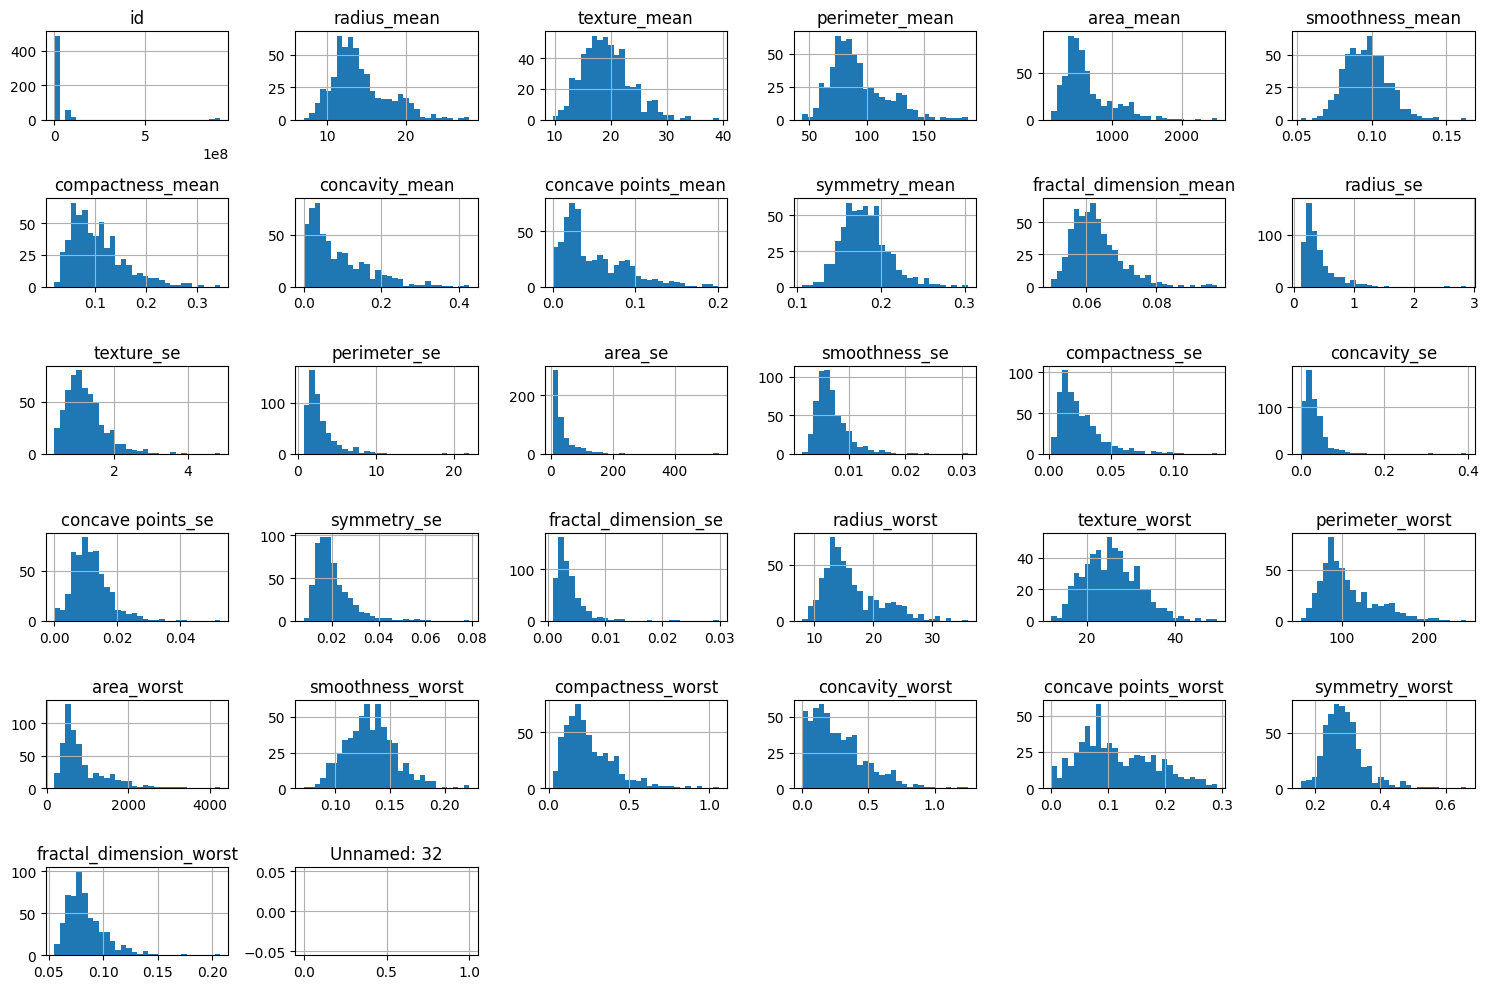

In [11]:
df.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

In [27]:
diagnosis_counts=df["diagnosis"].value_counts()
diagnosis_counts

,count
diagnosis,
B,357
M,212


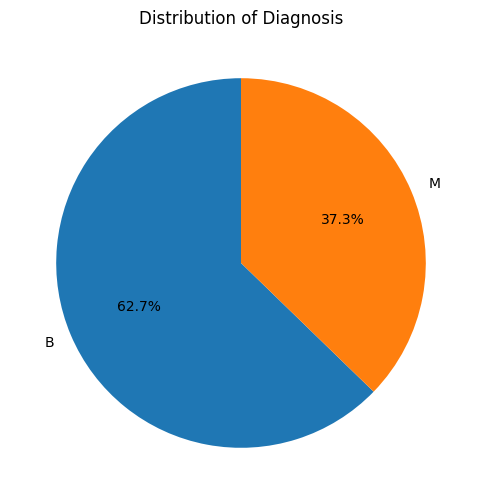

In [18]:
# Create the pie plot
plt.figure(figsize=(6, 6))  # Adjust figure size if needed
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diagnosis')
plt.show()

We notice that benign tumors are more common, even 62.7%, which is a hopeful news, because they are less dangerous, unlike malignant ones.

#Data preprocessing

In [28]:
from sklearn.preprocessing import LabelEncoder

LE= LabelEncoder()
df['diagnosis'] = LE.fit_transform(df['diagnosis'])

In [29]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
cols=df.columns

In [33]:
correlation_matrix=df.corr()
correlation_matrix

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


To build an accurate model without unnecessary information, we will keep only features with a correlation above 0.5 with the target column "diagnosis." We will also check for and remove outliers in these features.

In [38]:
#list of top features that have high correlation between features and target
features = df.corr()['diagnosis'].sort_values()
features

,diagnosis
smoothness_se,-0.067016
fractal_dimension_mean,-0.012838
texture_se,-0.008303
symmetry_se,-0.006522
id,0.039769
fractal_dimension_se,0.077972
concavity_se,0.253730
compactness_se,0.292999
fractal_dimension_worst,0.323872
symmetry_mean,0.330499


In [39]:
high_corr_features = features[features >= 0.5].index
high_corr_features

Index(['area_se', 'perimeter_se', 'radius_se', 'compactness_worst',
       'compactness_mean', 'concavity_worst', 'concavity_mean', 'area_mean',
       'radius_mean', 'area_worst', 'perimeter_mean', 'radius_worst',
       'concave points_mean', 'perimeter_worst', 'concave points_worst',
       'diagnosis'],
      dtype='object')

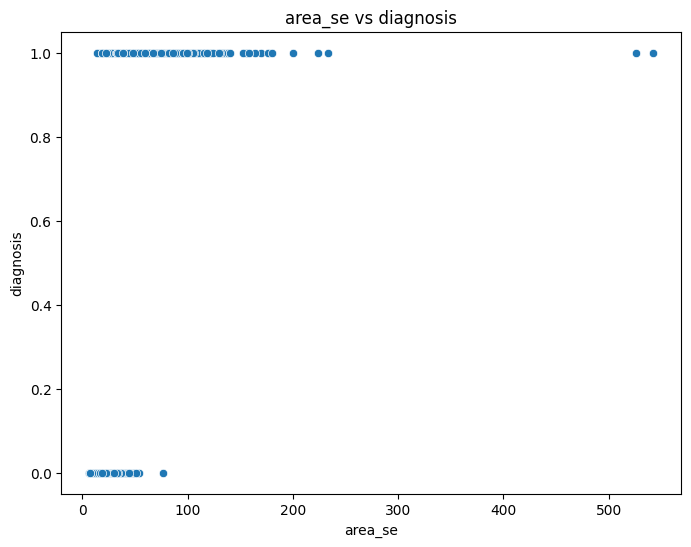

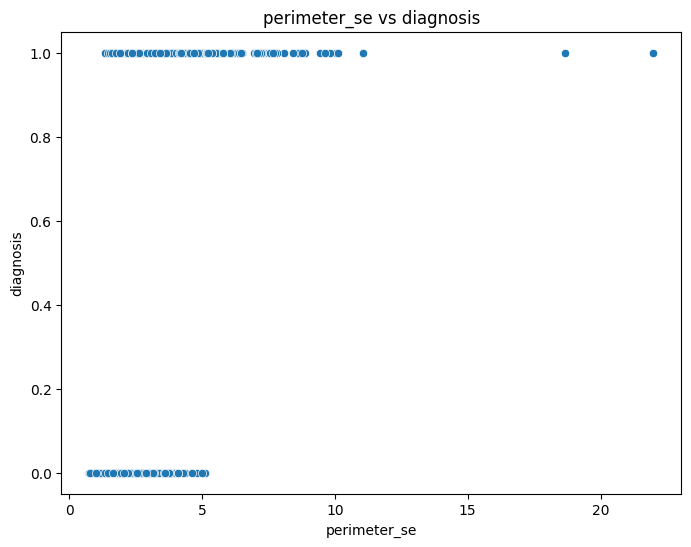

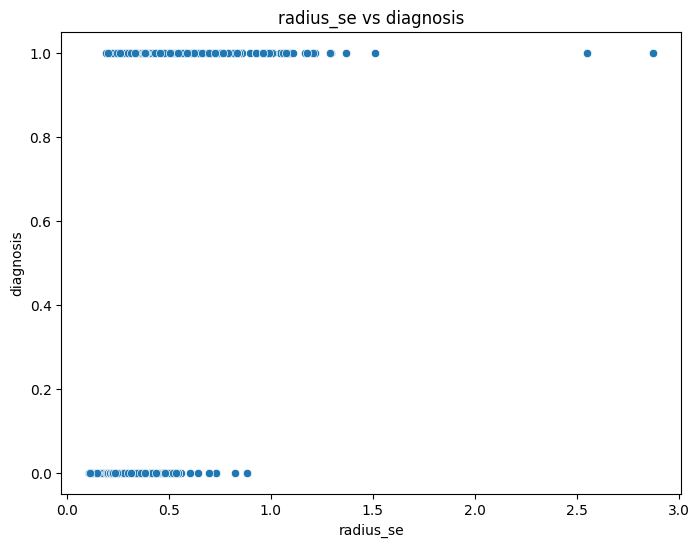

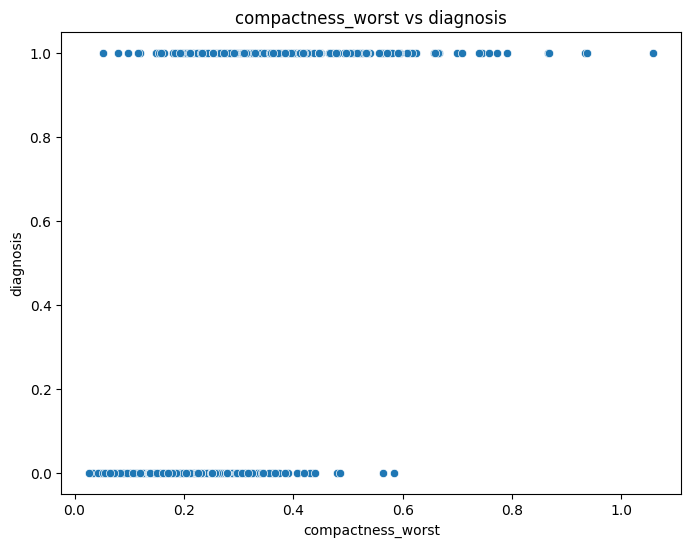

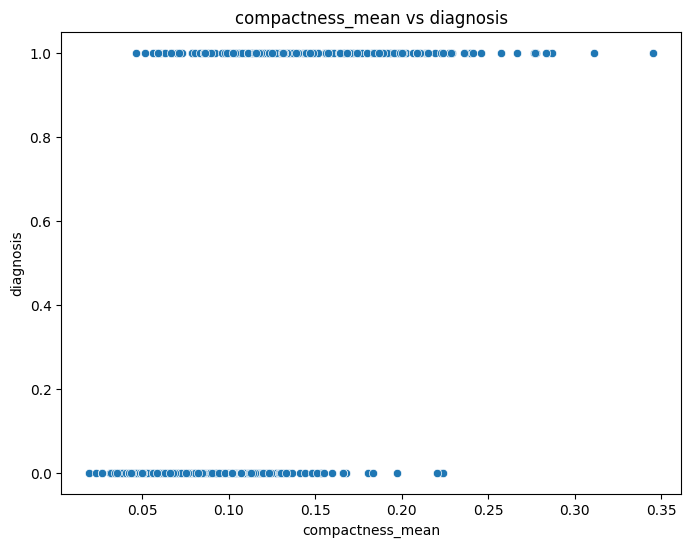

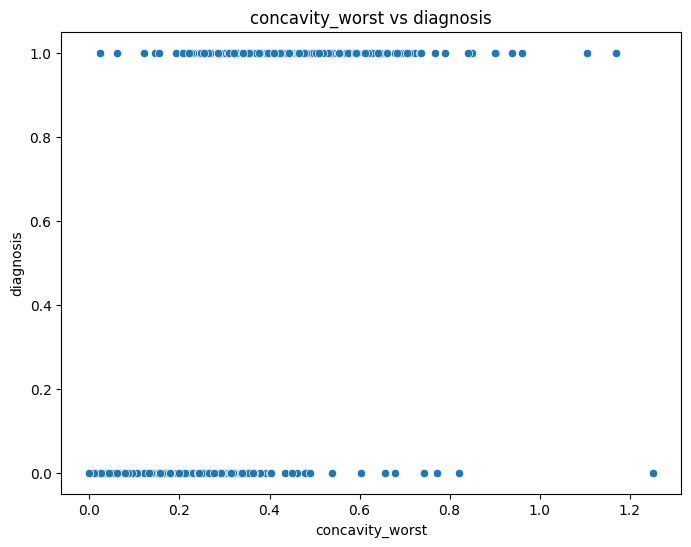

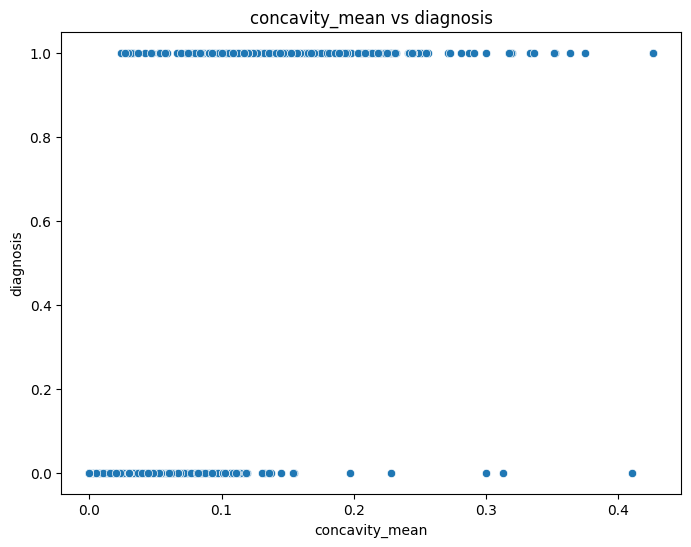

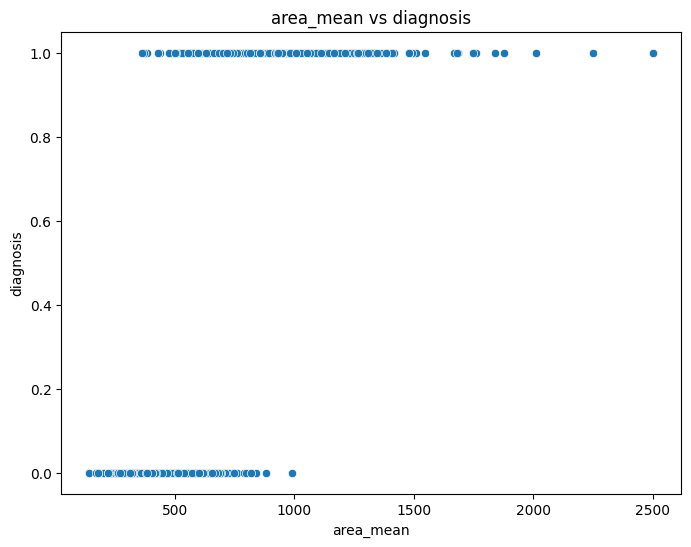

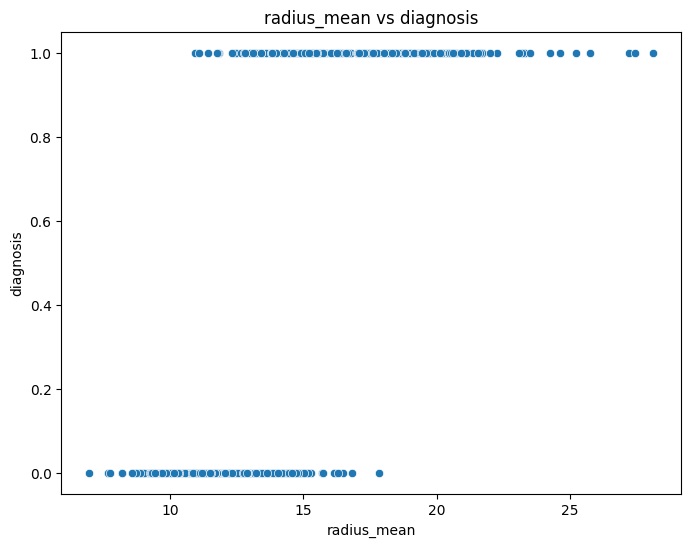

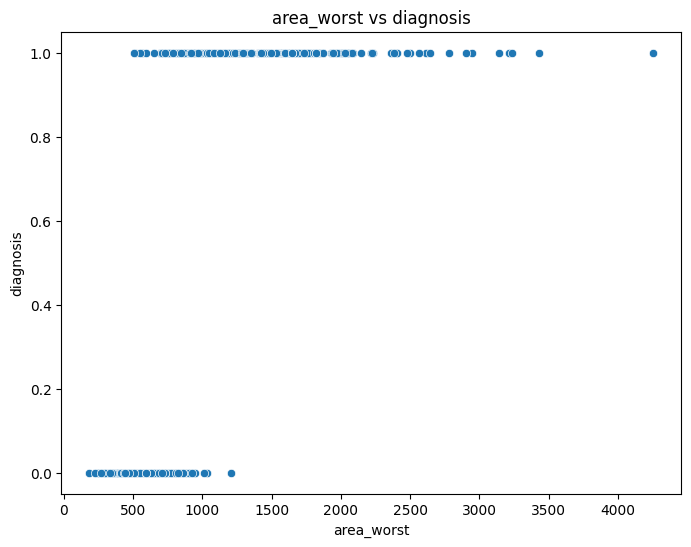

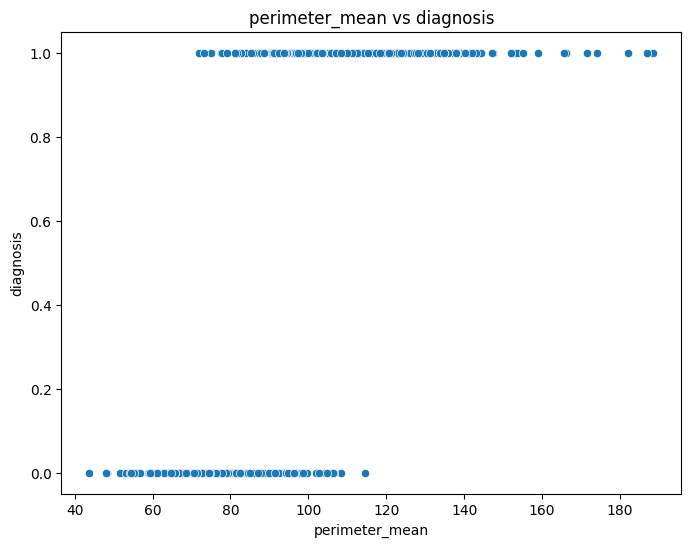

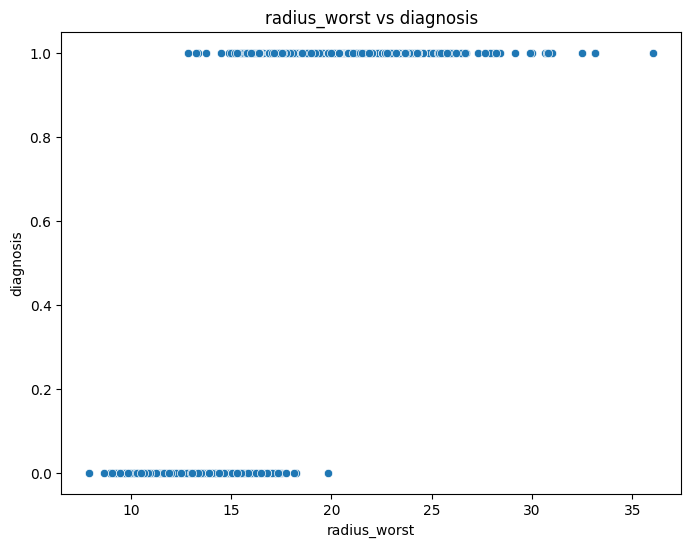

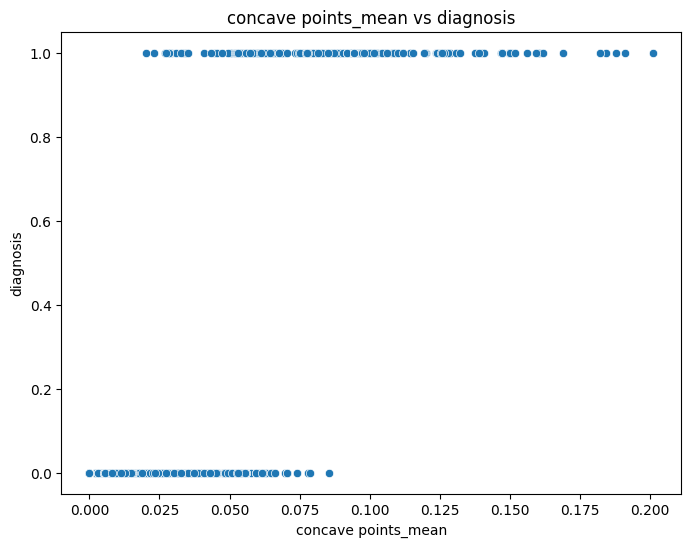

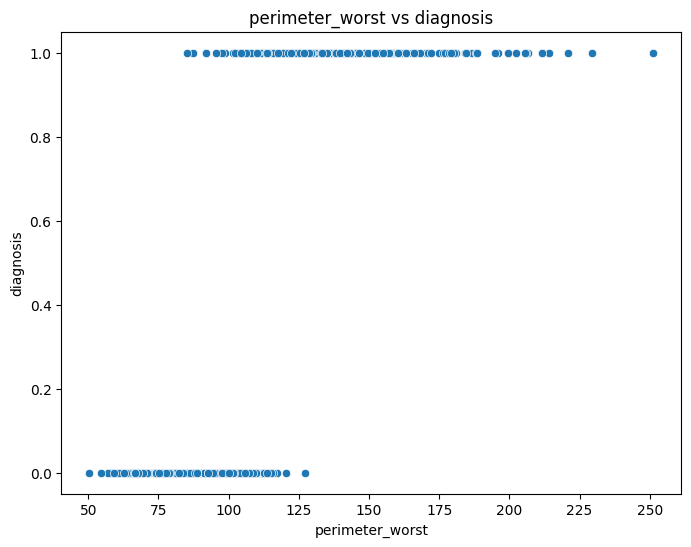

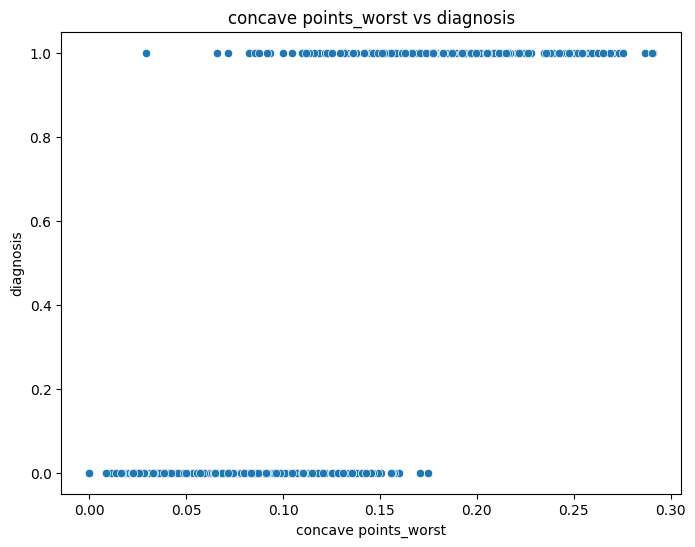

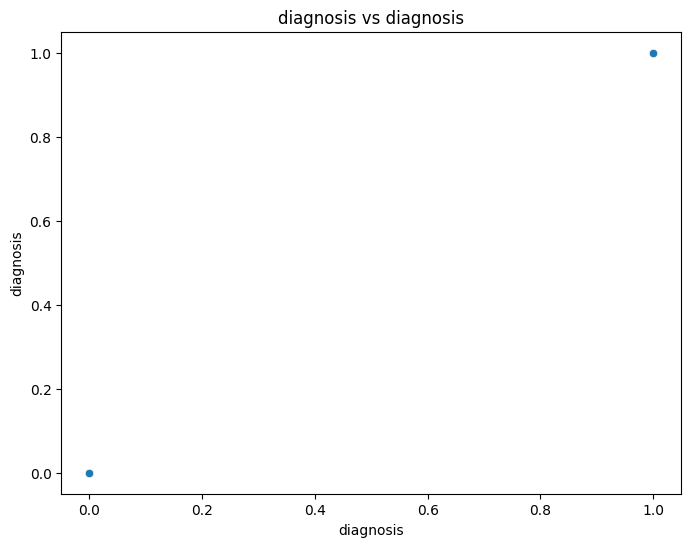

In [41]:
# Create scatter plots for each numerical column against 'Total Revenue'
for col in high_corr_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.scatterplot(x=col, y='diagnosis', data=df)
    plt.title(f'{col} vs diagnosis')
    plt.xlabel(col)
    plt.ylabel('diagnosis')
    plt.show()

#Defining and X and y

In [55]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

#splitting the data to train data and test data

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 31)
Shape of X_test: (114, 31)
Shape of y_train: (455,)
Shape of y_test: (114,)


In [57]:
X_train.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,859471,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,873593,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,859196,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,88466802,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,858970,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


In [58]:
y_train.head()

,diagnosis
68,0
181,1
63,0
248,0
60,0


#scaling the splitted data

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Knearest neighbor-KNN


In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)  # Choose k=3
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
y_pred_knn=knn.predict(X_test)

In [65]:
y_pred_knn

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [67]:
score=knn.score(X_test,y_test)
score

0.9473684210526315

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy=accuracy_score(y_pred_knn,y_test)
accuracy

0.9473684210526315

In [72]:
import numpy as np
from sklearn.model_selection import cross_val_score
mean_scores = []
k_values=range(1,11)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform cross-validation and calculate the mean score (accuracy)
    # 5-fold cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores.append(np.mean(scores))


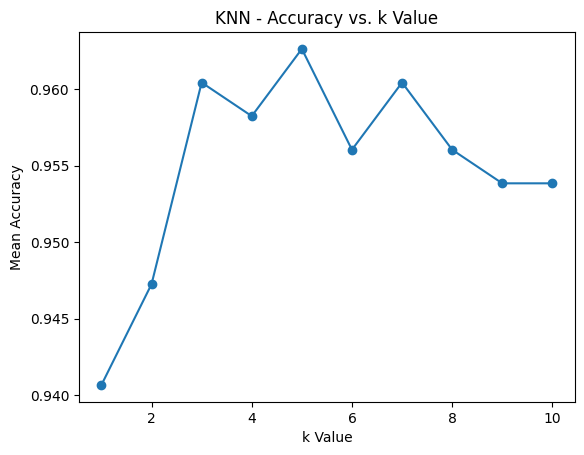

In [73]:
import matplotlib.pyplot as plt

plt.plot(k_values, mean_scores, marker='o')
plt.title('KNN - Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Mean Accuracy')
plt.show()

In [74]:
# Find the best k (the one with the highest mean score)
best_k = k_values[np.argmax(mean_scores)]
print(best_k)


5


In [75]:
best_score = np.max(mean_scores)
print(best_score)

0.9626373626373628


In [79]:
#mean_scores

In [80]:
#np.argmax(mean_scores)

In [81]:
#k_values[4]

In [84]:
 #KNN Classifier,with updated value
knn = KNeighborsClassifier(n_neighbors=5)  # Choose k=5
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [85]:
y_pred_knn2=knn.predict(X_test)

In [86]:
accuracy=accuracy_score(y_pred_knn2,y_test)
accuracy

0.9473684210526315